This is a simple version of a recommender system. The dataset is taken from Andrew Ng's Coursera course on Machine Learning, week 8. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
#import tensorflow as tf
%matplotlib inline

In [208]:
# Load the movie ratings dataset
data = scipy.io.loadmat('ex8_movies.mat')
Y = data['Y']
R = data['R']

In [89]:
print(Y.shape)

(1682, 943)


In [90]:
print(R.shape)

(1682, 943)


Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on 943 users

R is a 1682x943 matrix, where R(i,j) = 1 iff user j gave a rating to movie i

Movie number 11 is Se7en (1995). We can look up how many people watched it and its mean rating.

In [178]:
print('%d people watched "Se7en".' % np.sum(R[10, np.where(R[10] == 1)]))
print('Mean rating - %f' % np.mean(Y[10, np.where(R[10] == 1)]))

236 people watched "Se7en".
Mean rating - 3.847458


This is what the movie ratings dataset looks like.

Text(0,0.5,'Movies')

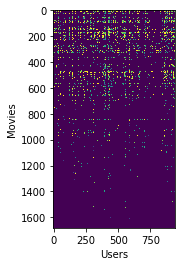

In [48]:
plt.imshow(Y)
plt.xlabel("Users")
plt.ylabel("Movies")

We can see that there are a lot more ratings for the movies near the beginning of the dataset; the movies near the end have fewer ratings.

In [209]:
num_features = 10
num_users = Y.shape[1]
num_movies = Y.shape[0]

Set up tensorflow variables for X and Theta and train them using gradient descent on a collaborative filtering cost function with regularization. To test how close the recommender system is we can look at all the movies a certain user has rated and compare that to the system's predictions. For fun I am going to add my predictions to the dataset and then see what the system predicts. The movie titles are in the file movie_ids.txt.

In [194]:
p = np.zeros((num_movies, 1))
r = np.zeros((num_movies, 1))

In [210]:
p[0] = 4
p[10] = 5
p[11] = 4
p[21] = 2
p[22] = 2
p[97] = 3
p[181] = 5
p[466] = 4
p[754] = 1
p[70] = 3
r[0] = 1
r[10] = 1
r[11] = 1
r[21] = 1
r[22] = 1
r[97] = 1
r[181] = 1
r[466] = 1
r[754] = 1
r[70] = 1
Y = np.append(Y, p, axis = 1)
R = np.append(R, r, axis = 1)
num_users = Y.shape[1]
num_movies = Y.shape[0]
ind = [0, 10, 11, 21, 22, 97, 181, 466, 754, 70]

In [215]:
X = tf.Variable(tf.random_uniform([num_movies, num_features]))
Theta = tf.Variable(tf.random_uniform([num_users, num_features]))

In [216]:
def normalizeRatings(Y, R):
    m, n = Y.shape
    Y_mean = np.zeros((m, 1))
    Y_normalized = np.array(Y, dtype = 'float64')
    for i in range(m):
        Y_mean[i] = np.mean(Y[i, np.where(R[i, :] == 1)])
        Y_normalized[i, :] = (Y_normalized[i, :] - Y_mean[i]).reshape((1, n))
    Y_normalized = np.multiply(Y_normalized, R)
    return (Y_mean, Y_normalized)



In [217]:
Y_mean, Y_norm = normalizeRatings(Y, R)

In [230]:
loss = tf.reduce_mean(tf.square(tf.multiply(tf.matmul(X, Theta, transpose_b = True) - Y, R))) + tf.reduce_mean(tf.multiply((lambda1/2),tf.square(Theta))) \
                + tf.reduce_mean(tf.multiply((lambda1/2),tf.square(X)))
# loss is the cost function for collaborative filtering with regularization. Tensorflow takes care of calculating 
# the derivatives
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [233]:
num_epochs = 20000

In [234]:
for epoch in range(num_epochs):
    sess.run(train)
    if epoch % 20 == 0:
        print("The cost in epoch %d: %.4f" %  (epoch, sess.run(loss)))

The cost in epoch 0: 3.1102
The cost in epoch 20: 3.0710
The cost in epoch 40: 3.0327
The cost in epoch 60: 2.9952
The cost in epoch 80: 2.9586
The cost in epoch 100: 2.9227
The cost in epoch 120: 2.8875
The cost in epoch 140: 2.8531
The cost in epoch 160: 2.8195
The cost in epoch 180: 2.7865
The cost in epoch 200: 2.7542
The cost in epoch 220: 2.7226
The cost in epoch 240: 2.6916
The cost in epoch 260: 2.6613
The cost in epoch 280: 2.6316
The cost in epoch 300: 2.6025
The cost in epoch 320: 2.5740
The cost in epoch 340: 2.5460
The cost in epoch 360: 2.5186
The cost in epoch 380: 2.4917
The cost in epoch 400: 2.4654
The cost in epoch 420: 2.4396
The cost in epoch 440: 2.4143
The cost in epoch 460: 2.3894
The cost in epoch 480: 2.3651
The cost in epoch 500: 2.3412
The cost in epoch 520: 2.3178
The cost in epoch 540: 2.2948
The cost in epoch 560: 2.2723
The cost in epoch 580: 2.2502
The cost in epoch 600: 2.2285
The cost in epoch 620: 2.2072
The cost in epoch 640: 2.1864
The cost in epoc

In [235]:
X_ = sess.run(X)
Theta_ = sess.run(Theta)

In [251]:
P_ = np.dot(X_, np.transpose(Theta_))